In [14]:
import requests
import pandas as pd
# total number of records 18186 
endpoint = 'https://data.gov.sg/api/action/datastore_search'
url = 'https://data.gov.sg/api/action/datastore_search?resource_id=6b1ec2ff-7c38-4ce9-9bbb-af865b4d78cb&limit=20000'
r = requests.get(url=url)
data = r.json()

In [36]:
if data['success']:
    results = data['result']['records']
    df = pd.DataFrame(results)
    print(df.head())
else:
    print(data['error'])

         town flat_type  quarter  _id median_rent
0  ANG MO KIO      1-RM  2005-Q2    1          na
1  ANG MO KIO      2-RM  2005-Q2    2          na
2  ANG MO KIO      3-RM  2005-Q2    3         800
3  ANG MO KIO      4-RM  2005-Q2    4         950
4  ANG MO KIO      5-RM  2005-Q2    5           -


In [37]:
df.town.value_counts()

BISHAN             700
KALLANG/WHAMPOA    696
TAMPINES           696
HOUGANG            696
JURONG WEST        696
WOODLANDS          696
SERANGOON          696
QUEENSTOWN         696
GEYLANG            696
YISHUN             696
PASIR RIS          696
BUKIT PANJANG      696
CHOA CHU KANG      696
BUKIT MERAH        696
MARINE PARADE      696
SEMBAWANG          696
TOA PAYOH          696
SENGKANG           696
CLEMENTI           696
BUKIT TIMAH        696
JURONG EAST        696
PUNGGOL            696
CENTRAL            694
BEDOK              692
BUKIT BATOK        692
ANG MO KIO         684
LIM CHU KANG       108
Name: town, dtype: int64

In [38]:
df.flat_type.value_counts()

EXEC    3032
4-RM    3032
3-RM    3032
5-RM    3030
2-RM    3030
1-RM    3030
Name: flat_type, dtype: int64

In [44]:
df = df[df.median_rent!='na']
df = df[df.median_rent!='-']
df.dropna

<bound method DataFrame.dropna of              town flat_type  quarter    _id median_rent
2      ANG MO KIO      3-RM  2005-Q2      3         800
3      ANG MO KIO      4-RM  2005-Q2      4         950
8           BEDOK      3-RM  2005-Q2      9         800
9           BEDOK      4-RM  2005-Q2     10         900
10          BEDOK      5-RM  2005-Q2     11        1025
...           ...       ...      ...    ...         ...
18179   WOODLANDS      EXEC  2019-Q3  18180        2100
18182      YISHUN      3-RM  2019-Q3  18183        1600
18183      YISHUN      4-RM  2019-Q3  18184        1800
18184      YISHUN      5-RM  2019-Q3  18185        2000
18185      YISHUN      EXEC  2019-Q3  18186        2000

[8372 rows x 5 columns]>

In [46]:
df.astype({'median_rent': 'int32'}).dtypes

town           object
flat_type      object
quarter        object
_id             int64
median_rent     int32
dtype: object

In [49]:
df[df.town=='KALLANG/WHAMPOA'].flat_type.value_counts()

3-RM    116
4-RM    108
5-RM     86
Name: flat_type, dtype: int64

In [58]:
df_kallang = df[df.town=='KALLANG/WHAMPOA']
df_kallang_3rm = df_kallang[df.flat_type=='3-RM']
df_kallang_4rm = df_kallang[df.flat_type=='4-RM']
df_kallang_5rm = df_kallang[df.flat_type=='5-RM']

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.


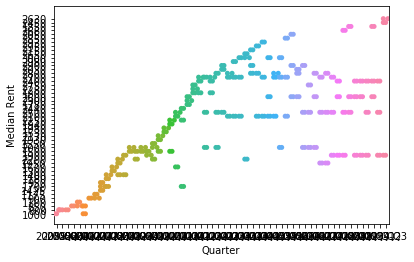

In [60]:
import seaborn as sns
import matplotlib.pyplot as plt
# Create bee swarm plot with Seaborn's default settings
_ = sns.swarmplot(x='quarter', y='median_rent', data=df_kallang_4)

# Label the axes
_ = plt.xlabel('Quarter')
_ = plt.ylabel('Median Rent')
# Show the plot
plt.show()

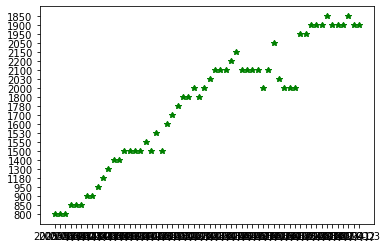

In [59]:
plt.plot('quarter', 'median_rent', data=df_kallang_3rm, marker='*', color='green', linewidth=0)
plt.show()